In [2]:
import pandas as pd

In [3]:
from pandas import datetime
import matplotlib.pyplot as plt

In [4]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

In [5]:
sales = pd.read_csv('sales-cars.csv', parse_dates=[0], index_col=0, date_parser = parser)

/home/rnsandeep/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [6]:
sales.head(5)

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


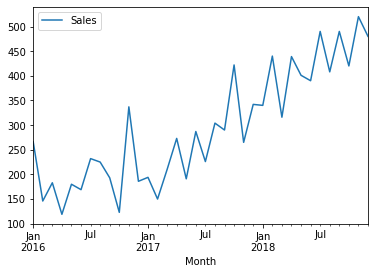

In [7]:
sales.plot()

In [8]:
# this graph is not stationary.

In [9]:
# convert this to stationary to apply models.

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

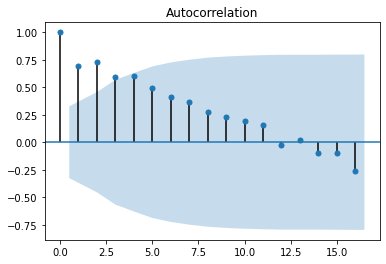

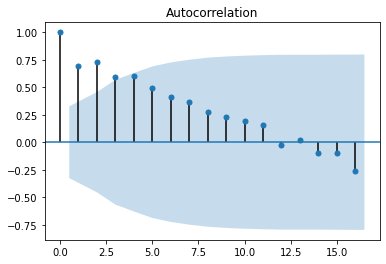

In [17]:
plot_acf(sales)

In [18]:
# series is not dying immediately so it is not stationary data.

In [19]:
sales_diff = sales.diff(periods=1)[1:]

In [20]:
sales_diff.head(5)

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [21]:
from statsmodels.graphics.tsaplots import plot_acf

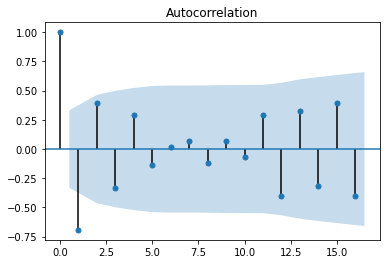

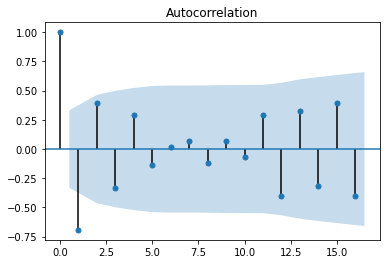

In [22]:
plot_acf(sales_diff)

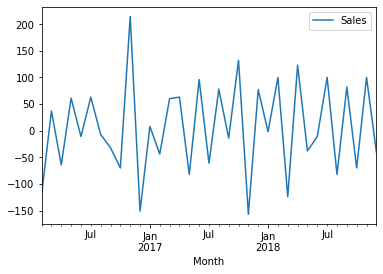

In [23]:
sales_diff.plot()

In [25]:
from statsmodels.tsa.ar_model import AR

In [26]:
from sklearn.metrics import mean_squared_error

In [58]:
X = sales.values

In [59]:
train = X[:27]

In [108]:
test = X[27:]

In [61]:
model_ar = AR(train)

In [62]:
model_ar_fit = model_ar.fit()

In [66]:
predictions = model_ar_fit.predict(start=26, end=36)

In [67]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

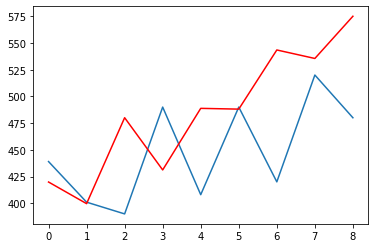

In [111]:
plt.plot(test)
plt.plot(predictions[0], color='red')

In [113]:
error = mean_squared_error(test,predictions[0] )
error

4775.629132045167

In [70]:
# ARIMA model

In [71]:
from statsmodels.tsa.arima_model import ARIMA

In [72]:
#p, d, q
# p = periods taken for auto regressor.
# d = order of Integrated.
# q = moving average.

In [97]:
model_arima = ARIMA(train, order=(4,2,1))

In [104]:
model_arima_fit = model_arima.fit()
model_arima_fit.aic

291.3991344717415

In [99]:
predictions = model_arima_fit.forecast(steps=9)

In [100]:
predictions

(array([419.8621905 , 399.60373759, 480.05780359, 431.16698004,
        488.80133064, 488.07658385, 543.45022627, 535.49535074,
        575.01634511]),
 array([53.13012053, 53.25871844, 55.43961057, 55.44115099, 64.20392667,
        64.65091718, 66.6319179 , 66.89978401, 70.36561332]),
 array([[315.72906776, 523.99531324],
        [295.21856759, 503.98890759],
        [371.39816355, 588.71744362],
        [322.50432085, 539.82963924],
        [362.9639467 , 614.63871459],
        [361.36311461, 614.79005308],
        [412.85406696, 674.04638558],
        [404.37418351, 666.61651796],
        [437.10227726, 712.93041297]]))

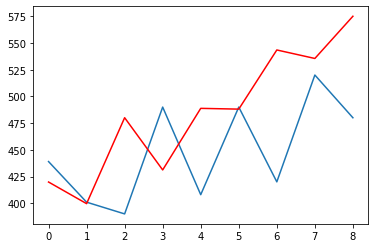

In [102]:
plt.plot(test)
plt.plot(predictions[0], color='red')

In [85]:
import itertools

In [86]:
p=d=q=range(0,5)

In [87]:
pdq = list(itertools.product(p, d, q))

In [88]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [114]:
error = mean_squared_error(test,predictions[0] )
error

4775.629132045167